In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from scipy.stats.mstats import winsorize


In [2]:
df=pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.shape

(2938, 22)

In [4]:
# check for the missing value
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
#rename columns
df.rename(columns = {" BMI " :"BMI", 
                                  "Life expectancy ": "Life_expectancy",
                                  "Adult Mortality":"Adult_mortality",
                                  "infant deaths":"Infant_deaths",
                                  "percentage expenditure":"Percentage_expenditure",
                                  "Hepatitis B":"HepatitisB",
                                  "Measles ":"Measles",
                                  "under-five deaths ": "Under_five_deaths",
                                  "Total expenditure":"Total_expenditure",
                                  "Diphtheria ": "Diphtheria",
                                  " thinness  1-19 years":"Thinness_1-19_years",
                                  " thinness 5-9 years":"Thinness_5-9_years",
                                  " HIV/AIDS":"HIV/AIDS",
                                  "Income composition of resources":"Income_composition_of_resources"}, inplace = True)

In [6]:
df.head(2)

,Country,Year,Status,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [7]:
#unique value in each column
df.apply(lambda x:len(x.unique()))

Country                             193
Year                                 16
Status                                2
Life_expectancy                     363
Adult_mortality                     426
Infant_deaths                       209
Alcohol                            1077
Percentage_expenditure             2328
HepatitisB                           88
Measles                             958
BMI                                 609
Under_five_deaths                   252
Polio                                74
Total_expenditure                   819
Diphtheria                           82
HIV/AIDS                            200
GDP                                2491
Population                         2279
Thinness_1-19_years                 201
Thinness_5-9_years                  208
Income_composition_of_resources     626
Schooling                           174
dtype: int64

In [8]:
#missing column list
missing_list=[col for col in df.columns if df[col].isnull().any() ]
missing_list

['Life_expectancy',
 'Adult_mortality',
 'Alcohol',
 'HepatitisB',
 'BMI',
 'Polio',
 'Total_expenditure',
 'Diphtheria',
 'GDP',
 'Population',
 'Thinness_1-19_years',
 'Thinness_5-9_years',
 'Income_composition_of_resources',
 'Schooling']

In [9]:
#filling missing value with median value as it is least affected by the outliers
for col in missing_list:
    df[col]=df[col].fillna(df[col].median())

# Removing outliers

In [10]:
col_dict = {'Life_expectancy':1,'Adult_mortality':2,'Infant_deaths':3,'Alcohol':4,'Percentage_expenditure':5,
            'HepatitisB':6,'Measles':7,'BMI':8,'Under_five_deaths':9,'Polio':10,'Total_expenditure':11,
            'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,'Thinness_1-19_years':16,
            'Thinness_5-9_years':17,'Income_composition_of_resources':18,'Schooling':19}



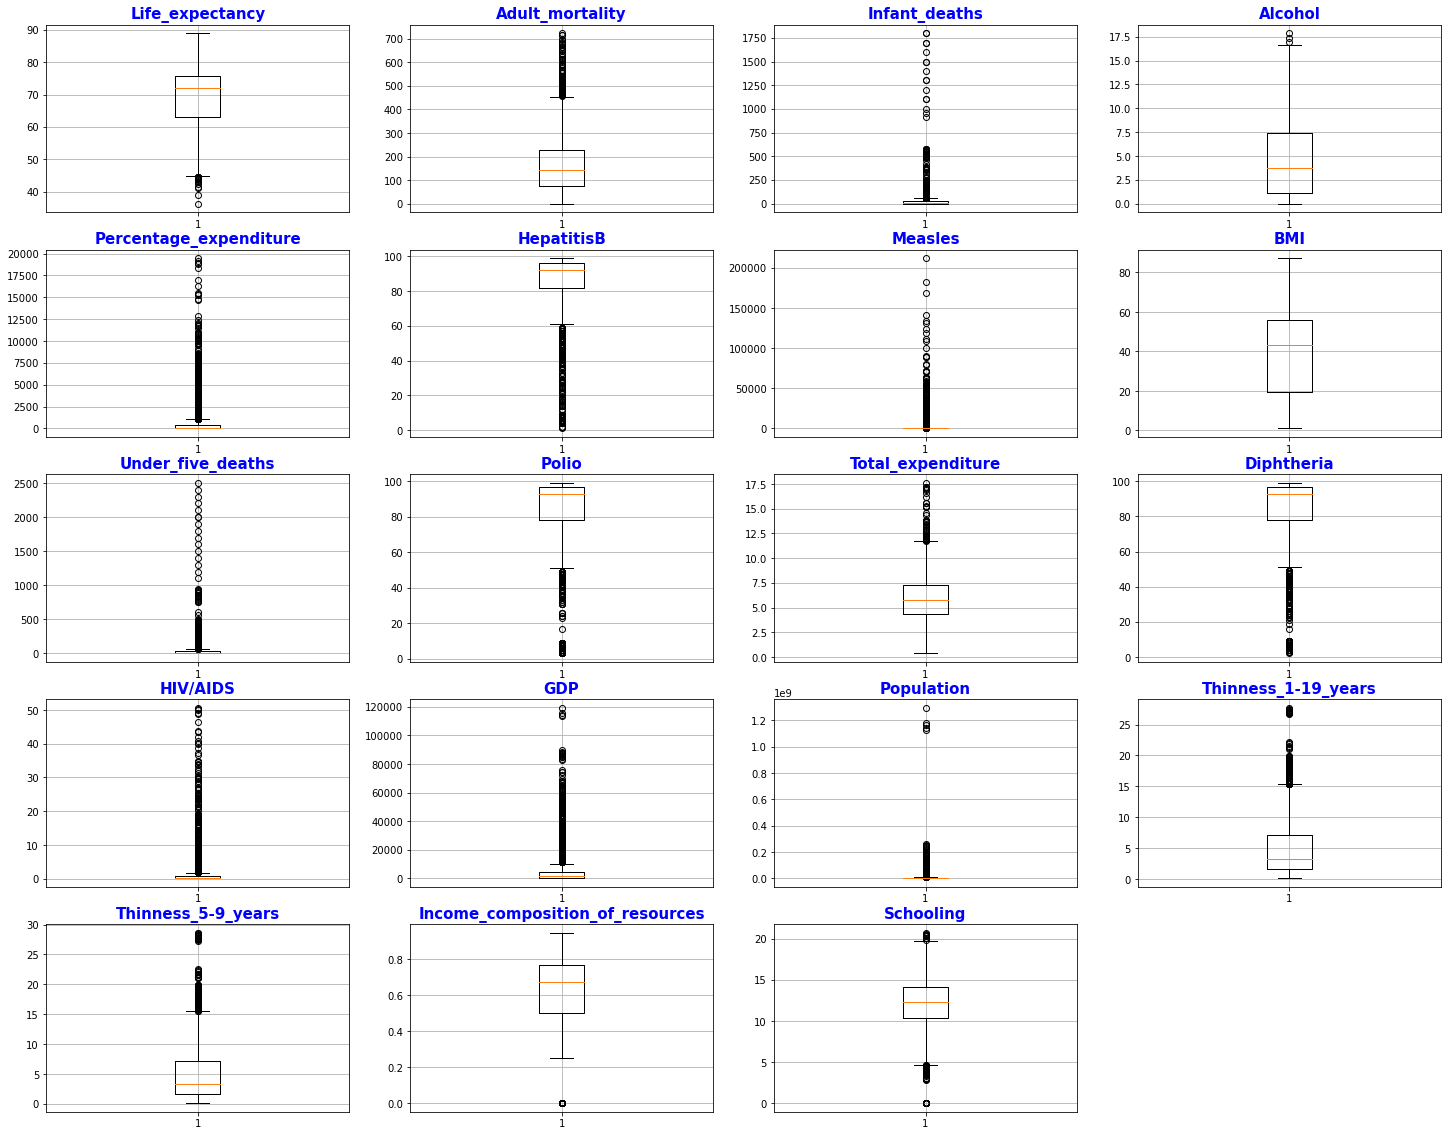

In [11]:
fig=plt.figure(figsize=(25,20))
for k,v in col_dict.items():
    plt.subplot(5,4,v)
    plt.boxplot(df[k])
    plt.title(k,fontsize=15,fontweight='bold',color='blue')
    plt.grid(True)
    
    

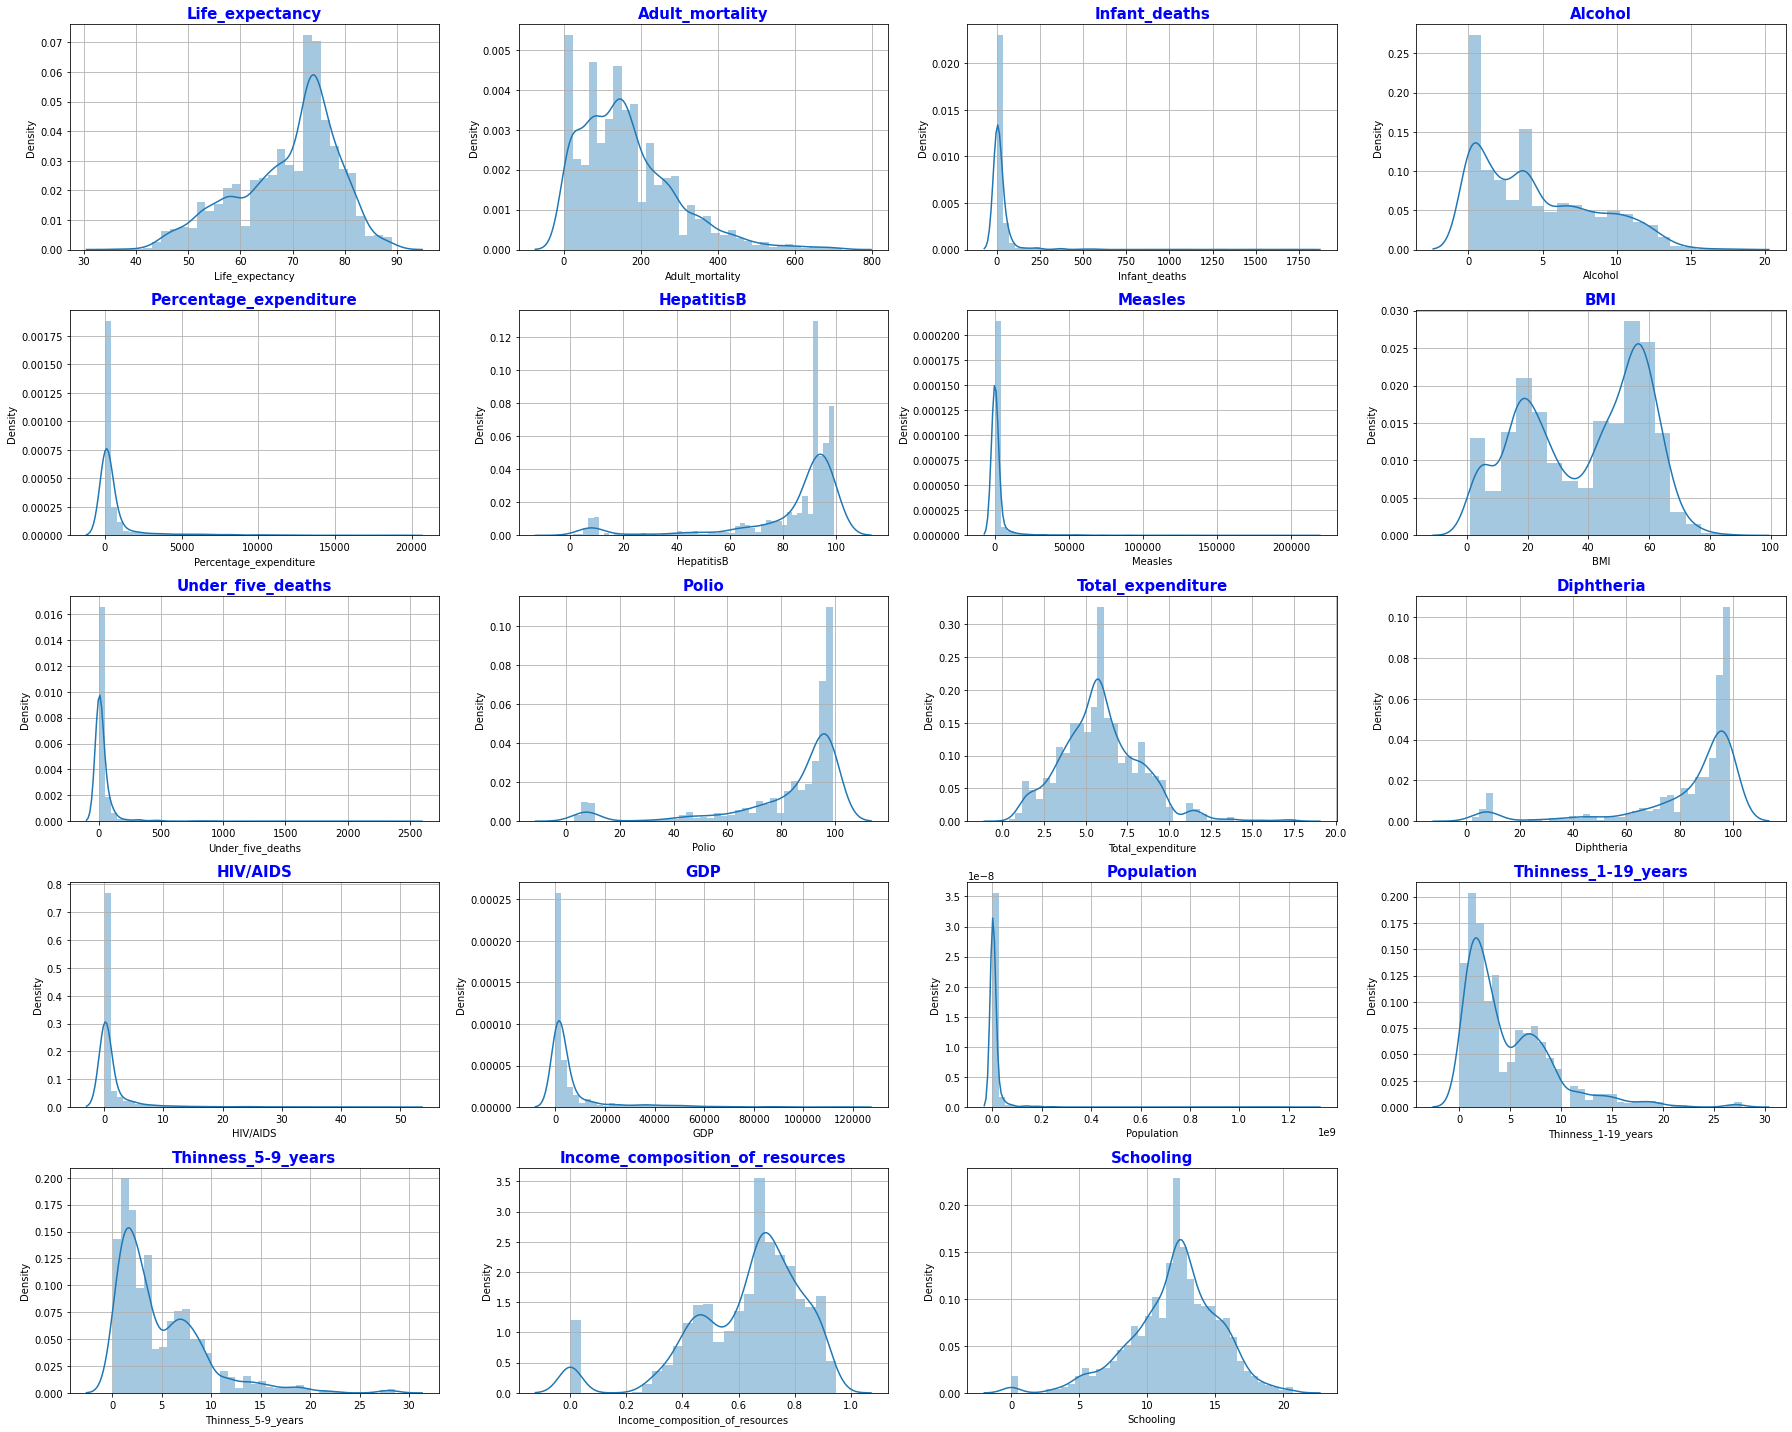

In [12]:
# distribution plot
fig=plt.figure(figsize=(25,20))
for k,v in col_dict.items():
    plt.subplot(5,4,v)
    sns.distplot(df[k])
    plt.title(k,fontsize=15,fontweight='bold',color='blue')
    plt.grid(True)
    plt.tight_layout()
    

In [14]:
#from above plot we can conclude
1)Infant_Deaths represents several infant deaths per 1,000 population. That is why the number beyond 1000 is unrealistic. 
We will therefore remove them as outliers. The same is true for measles and deaths under five,
as both are a number per 1,000 population.

2)we can see, some countries spend up to 20,000% of their GDP on health. Most countries spend less 
than 2,500% of their GDP on health. Since the values ​​are very important in the Expenditure_Percentage, GDP, 
and Population columns, it is better to take a logarithmic value or use winsorization if necessary.

3)BMI values are very unrealistic because the value plus 40 is considered extreme obesity. 
The median is over 40 and some countries have an average of around 60 which is not possible.
We can delete this whole column

In [13]:
df = df[df['Infant_deaths'] < 1001]
df = df[df['Measles'] < 1001]
df= df[df['Under_five_deaths'] < 1001]

In [14]:
df.drop(['BMI'], axis=1, inplace=True)
df['log_Percentage_expenditure'] = np.log(df['Percentage_expenditure'])
df['log_Population'] = np.log(df['Population'])
df['log_GDP'] = np.log(df['GDP'])
df = df.replace([np.inf, -np.inf], 0)
df['log_Percentage_expenditure']

C:\Users\Sabin Sapkota\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1       4.297606
2       4.293458
11      2.727596
12      2.405958
16      5.899829
          ...   
2932    2.165322
2933    0.000000
2934    0.000000
2935    0.000000
2936    0.000000
Name: log_Percentage_expenditure, Length: 2413, dtype: float64

In [15]:
df['winz_Life_expectancy'] = winsorize(df['Life_expectancy'], (0.05,0))
df['winz_Adult_mortality'] = winsorize(df['Adult_mortality'], (0,0.04))
df['winz_Alcohol'] = winsorize(df['Alcohol'], (0.0,0.01))
df['winz_HepatitisB'] = winsorize(df['HepatitisB'], (0.20,0.0))
df['winz_Polio'] = winsorize(df['Polio'], (0.20,0.0))
df['winz_Total_expenditure'] = winsorize(df['Total_expenditure'], (0.0,0.02))
df['winz_Diphtheria'] = winsorize(df['Diphtheria'], (0.11,0.0))
df['winz_HIV/AIDS'] = winsorize(df['HIV/AIDS'], (0.0,0.21))
df['winz_Thinness_1-19_years'] = winsorize(df['Thinness_1-19_years'], (0.0,0.04))
df['winz_Thinness_5-9_years'] = winsorize(df['Thinness_5-9_years'], (0.0,0.04))
df['winz_Income_composition_of_resources'] = winsorize(df['Income_composition_of_resources'], (0.05,0.0))
df['winz_Schooling'] = winsorize(df['Schooling'], (0.03,0.01))

In [16]:
col_dict_winz = {'winz_Life_expectancy':1,'winz_Adult_mortality':2,'Infant_deaths':3,'winz_Alcohol':4,
            'log_Percentage_expenditure':5,'winz_HepatitisB':6,'Measles':7,'Under_five_deaths':8,'winz_Polio':9,
            'winz_Total_expenditure':10,'winz_Diphtheria':11,'winz_HIV/AIDS':12,'log_GDP':13,'log_Population':14,
            'winz_Thinness_1-19_years':15,'winz_Thinness_5-9_years':16,'winz_Income_composition_of_resources':17,
            'winz_Schooling':18}

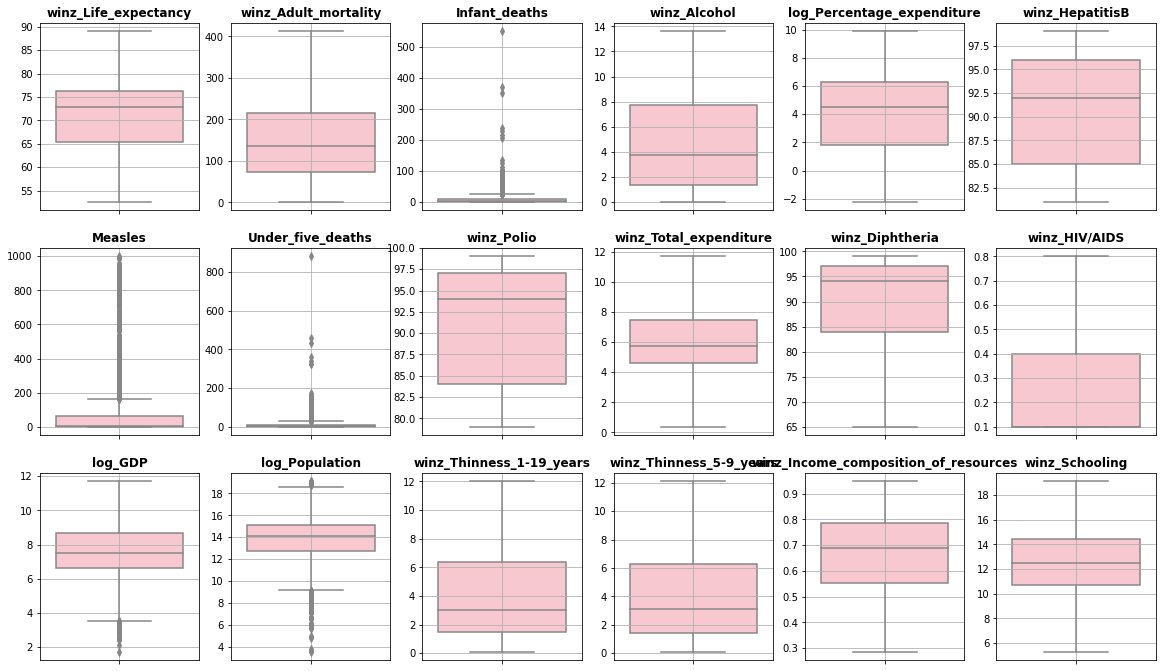

In [17]:
#lets see again box plot after the removable of the outliers
fig = plt.figure(figsize=(20,20))
for variable,i in col_dict_winz.items():
                     plt.subplot(5,6,i)
                     sns.boxplot(y = df[variable], color = "pink")
                     plt.title(variable,fontweight='bold')
                     plt.ylabel('')
                     
                     plt.grid(True)
    

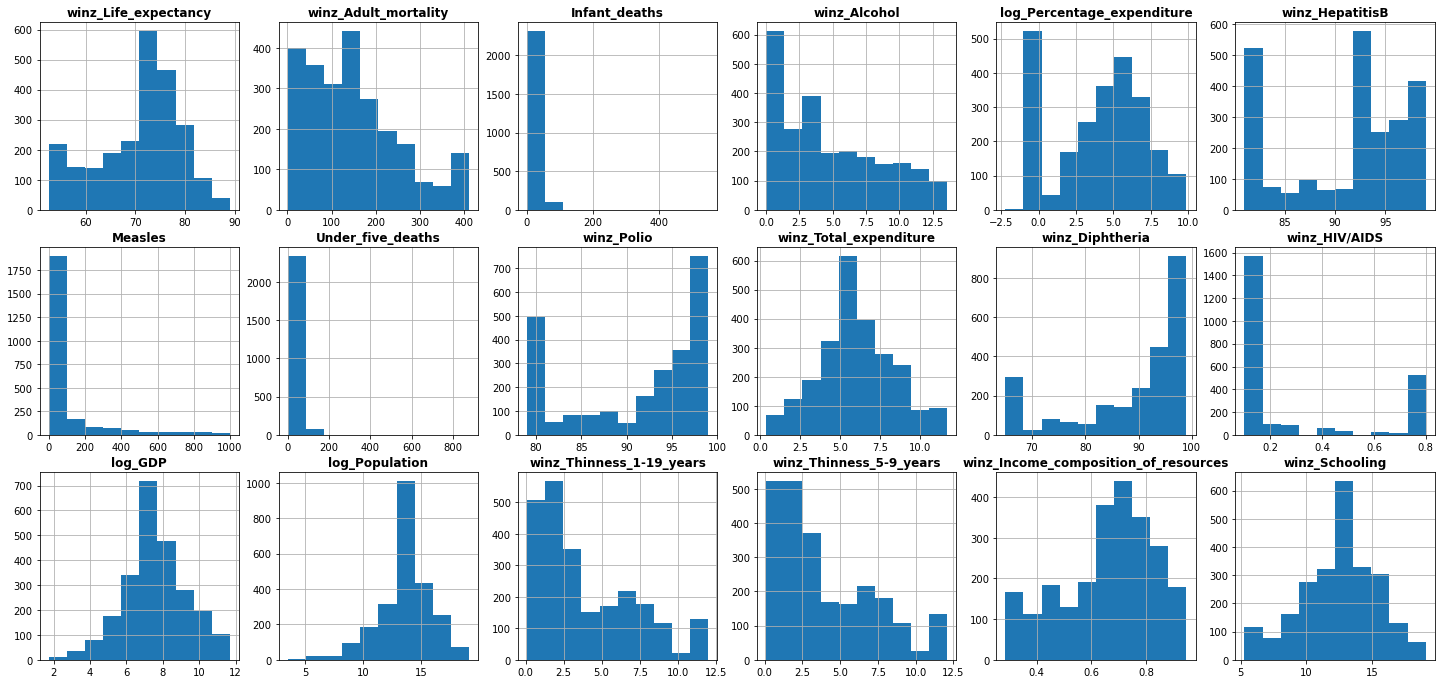

In [18]:
# lets see histogram after removable of outliers
fig = plt.figure(figsize=(25,20))
for variable,i in col_dict_winz.items():
                     plt.subplot(5,6,i)
                     plt.hist(df[variable])
                     plt.title(variable,fontweight='bold')
                     plt.ylabel('')
                     
                     plt.grid(True)
    

In [19]:
life_exp = df[['Year', 'Country', 'Status','winz_Life_expectancy','winz_Adult_mortality','Infant_deaths','winz_Alcohol',
            'log_Percentage_expenditure','winz_HepatitisB','Measles','Under_five_deaths','winz_Polio',
            'winz_Total_expenditure','winz_Diphtheria','winz_HIV/AIDS','log_GDP','log_Population',
            'winz_Thinness_1-19_years','winz_Thinness_5-9_years','winz_Income_composition_of_resources',
            'winz_Schooling']]

<AxesSubplot:>

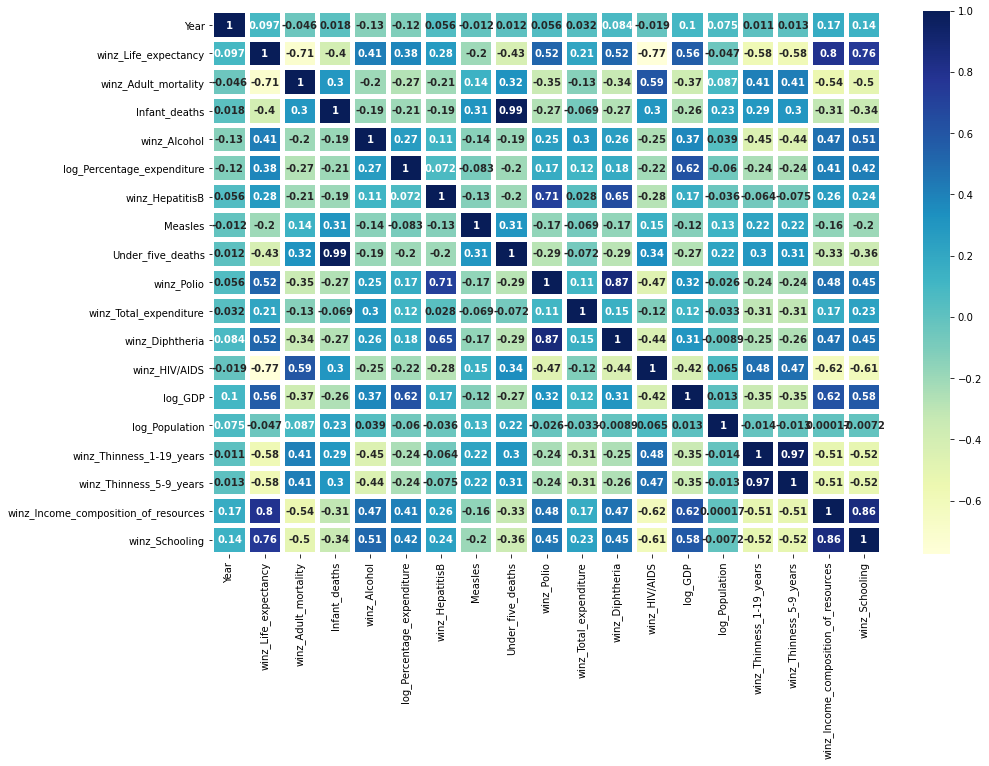

In [20]:
#lets see correlation with different feature
plt.figure(figsize=(15,10))
sns.heatmap(life_exp.corr(), annot =True, linewidths = 4,annot_kws={'fontweight':'bold','fontsize':10},
           cmap="YlGnBu")

# Life expectancy by Country Status

In [22]:
df1=df.groupby('Status')['Life_expectancy'].agg('mean')
df1



Status
Developed     79.131092
Developing    68.388178
Name: Life_expectancy, dtype: float64

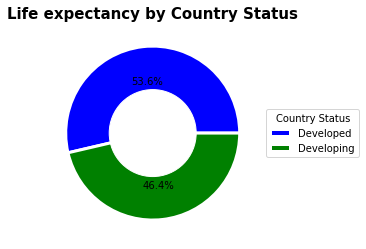

In [23]:
my_circle = plt.Circle( (0,0), 0.5, color='white')
plt.pie(df1,wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
       colors=['blue','green'], autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Life expectancy by Country Status",fontweight='bold',fontsize=15)
plt.legend(df1.index,
          title='Country Status',
          loc="center left",
         
          bbox_to_anchor=(1, 0, 0.5, 1));


# mean life expectancy by country status

In [36]:
final=df.groupby(['Year','Status'])['Life_expectancy'].agg('mean').reset_index()
final['Life_expectancy']=final['Life_expectancy'].apply(lambda x:round(x,0))
final

,Year,Status,Life_expectancy
0,2000,Developed,77.0
1,2000,Developing,68.0
2,2001,Developed,77.0
3,2001,Developing,68.0
4,2002,Developed,77.0
5,2002,Developing,68.0
6,2003,Developed,78.0
7,2003,Developing,67.0
8,2004,Developed,78.0
9,2004,Developing,66.0


In [32]:
df['Life_expectancy'].apply(lambda x:round(x,2))

1       59.9
2       59.9
11      57.0
12      56.7
16      77.8
        ... 
2932    44.6
2933    44.3
2934    44.5
2935    44.8
2936    45.3
Name: Life_expectancy, Length: 2413, dtype: float64

In [39]:
import plotly.express as px
fig=px.line(data_frame=final,x='Year',y='Life_expectancy',color='Status',text='Life_expectancy',
           title='mean life expectancy by country status')
fig.update_traces(textposition='top center',texttemplate='%{text:.s}')
fig.show()

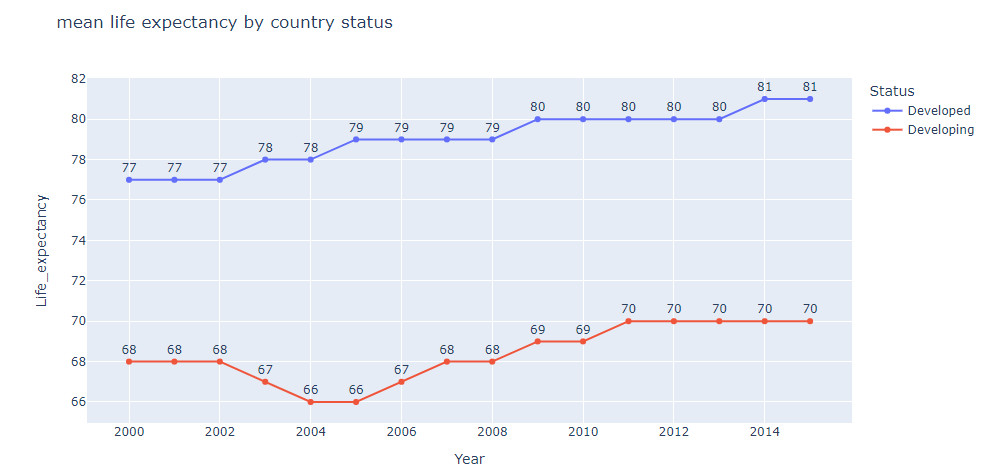

In [ ]:
df.set_index('Country',inplace=True)

In [117]:
#function that calculates life expectancy,GDP,population by country
def country_status(c):
    df1=df.loc[c,['Year','Life_expectancy','GDP','Population']]
    print(df1)
    
    #fig=px.line(df1,x='Year',y='Life_expectancy',text='Life_expectancy',
              # title=f'life expectancy of {c} in time scale ')
    
    #fig.update_traces(textposition='top center',texttemplate='%{text:.2s}')
   
    return df1.plot(x='Year',y='Life_expectancy',figsize=(15,7),
                   title=f'mean life expantancy of {c}'),df1.plot(x='Year',y='GDP',figsize=(15,7),title=f'GDP of {c}'),df1.plot(x='Year',y='Population',figsize=(15,7),title=f'population of {c}');
    
    

         Year  Life_expectancy          GDP  Population
Country                                                
France   2015             82.4  36526.77110   6662468.0
France   2014             82.2  42955.24287  66331957.0
France   2013             82.0  42554.12250   6599857.0
France   2012             81.5   4838.24440   6565979.0
France   2008             89.0  45413.65710   6437499.0
France   2007             89.0    416.58397   6416229.0
France   2006             86.0  36544.58530  63621376.0
France   2005             81.0  34879.72633  63179356.0
France   2003             79.3  29691.18158  62244884.0
France   2001             79.0  22527.31775  61357431.0


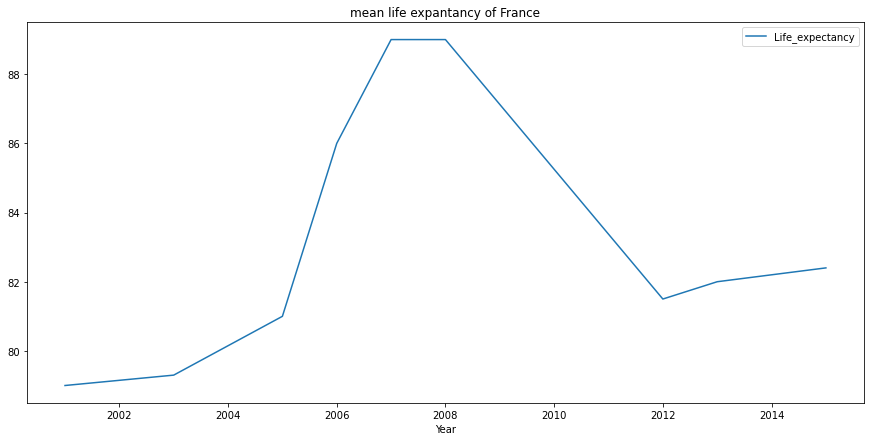

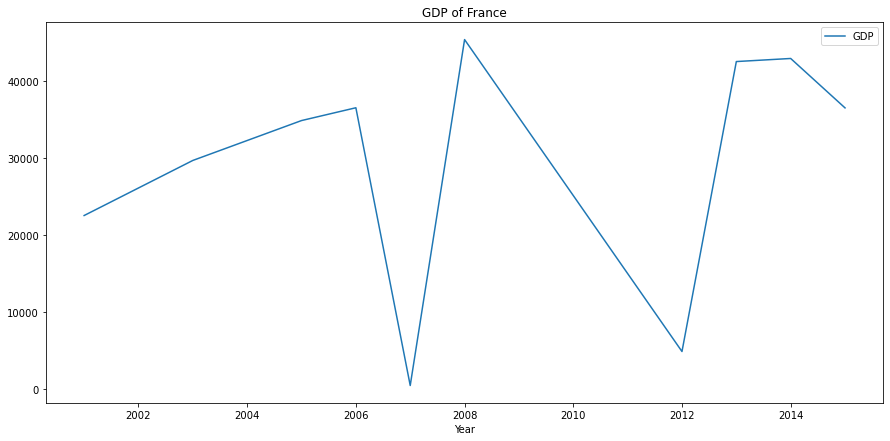

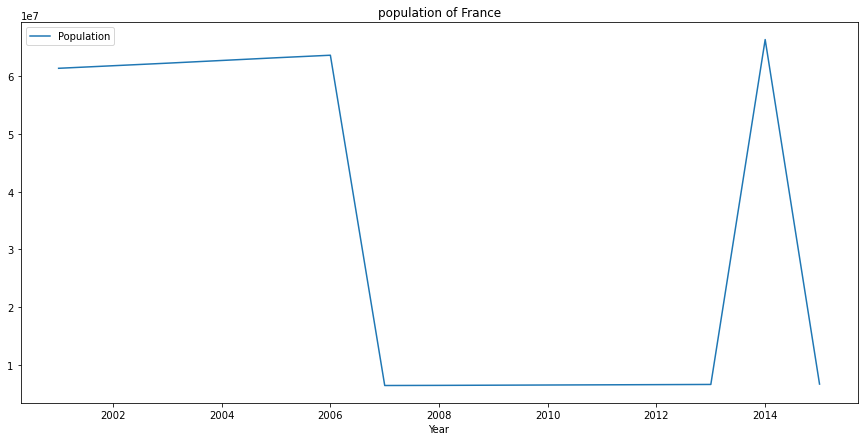

In [118]:
country_status('France');